# Use-case - You need to create a model that can predict the species of the flower based on the biological factor of the iris flower

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data= pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.species.value_counts() #Balanced Dataset

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [ ]:
label

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                 random_state=23)

modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print(modelKNN.score(X_train,y_train))
print(modelKNN.score(X_test,y_test))

0.9583333333333334
1.0


In [ ]:
#Numerical Perspective --- Approved the model !!!

modelKNN.score(features,label)

0.9666666666666667

In [ ]:
# Viz perspective for this dataset --> ROC AUC
# For demo I will show Both methods...

# Dealing with Multiclass Classification Problems

In [ ]:
# WE need to convert our prb set into Binary problem set. 
# This is achievable using OneVsRestClassifier
#
# We need to ensure our labels follow the binary nature for ROC and PR
# Rules for OneVsRestClassifier:
# 1. Labels must be NUMERIC in nature
# 2. Your model algo must support predict_proba , decision function

In [ ]:
data.species.unique().tolist()

['setosa', 'versicolor', 'virginica']

In [ ]:
# Step1: Encode the labels to Binary Labels
# Ensure label is written in ascending order
from sklearn.preprocessing import label_binarize

y = label_binarize(label, classes=['setosa', 'versicolor', 'virginica'])


In [ ]:
#Step2: Create Train Test Split

X_train,X_test,y_train,y_test = train_test_split(features,
                                                y,
                                                test_size=0.2,
                                                 random_state=23)

In [ ]:
#Step3: Apply algo on OneVsRestClassifier
# KNN doesnt support OneVSRestClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

multiClassModel = OneVsRestClassifier(LogisticRegression())

y_score = multiClassModel.fit(X_train,y_train).decision_function(features)


In [ ]:
y_score

array([[ 3.83606109e+00, -1.97392292e+00, -1.27063905e+01],
       [ 3.50578675e+00, -9.40184808e-01, -1.24435397e+01],
       [ 3.98086915e+00, -1.34431683e+00, -1.27340292e+01],
       [ 3.49715100e+00, -1.00315509e+00, -1.21163308e+01],
       [ 3.96269577e+00, -2.14609041e+00, -1.27150572e+01],
       [ 3.19007218e+00, -2.84916735e+00, -1.17027690e+01],
       [ 3.87695946e+00, -1.75008735e+00, -1.22903973e+01],
       [ 3.57415597e+00, -1.69255820e+00, -1.23618484e+01],
       [ 3.63877985e+00, -6.19816773e-01, -1.22467151e+01],
       [ 3.45943183e+00, -9.80722892e-01, -1.24295784e+01],
       [ 3.65116093e+00, -2.38196132e+00, -1.26073659e+01],
       [ 3.43888553e+00, -1.58336099e+00, -1.20259729e+01],
       [ 3.64115278e+00, -8.18952252e-01, -1.26313486e+01],
       [ 4.52294837e+00, -8.74842909e-01, -1.32940189e+01],
       [ 4.39360499e+00, -3.25075554e+00, -1.36723520e+01],
       [ 3.92070128e+00, -4.02719962e+00, -1.25432918e+01],
       [ 4.07732431e+00, -3.08835550e+00

1.0
0.8112
0.9975999999999999


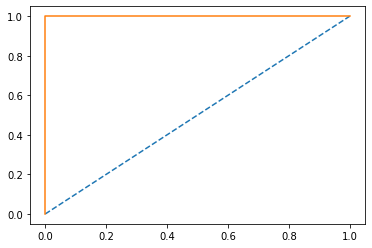

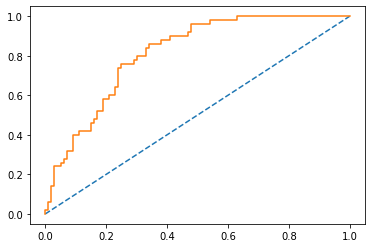

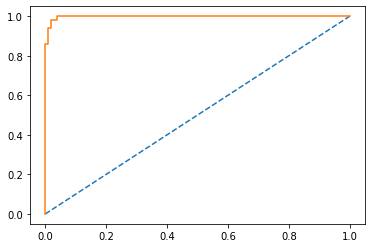

In [ ]:
#Plot ROC for each Label 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

fpr = dict()
tpr = dict()
auc = dict()


#Step1: Extract the prob of true value for your label (1)
#probabilityValues = model.predict_proba(X_test)[:,1]


for i in range(0,len(data.species.unique())):
    #Step2: Calc AUC
    auc[i] = roc_auc_score(y[:,i], y_score[:,i])
    #Step4: Calc fpr tpr
    fpr[i],tpr[i],_ = roc_curve(y[:,i], y_score[:,i])
    
    
for i in range(0,len(data.species.unique())):
    plt.figure()
    plt.plot([0,1],[0,1] , linestyle='--')
    plt.plot(fpr[i],tpr[i])
    print(auc[i])

1.0
0.6251095152832314
0.9951638571214363


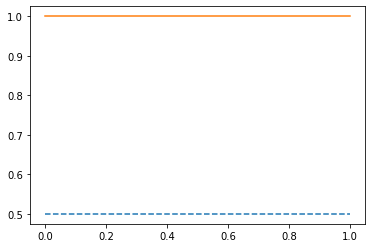

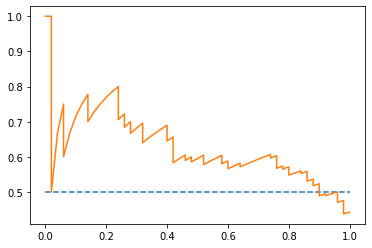

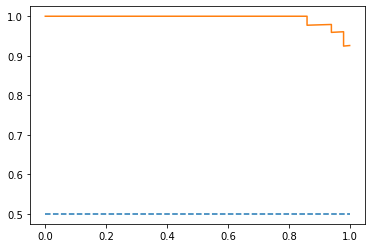

In [ ]:
#Plot ROC for each Label 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

precision = dict()
recall = dict()
auc1 = dict()


#Step1: Extract the prob of true value for your label (1)
#probabilityValues = model.predict_proba(X_test)[:,1]


for i in range(0,len(data.species.unique())):
    
    #Step4: Calc fpr tpr
    precision[i],recall[i],_ = precision_recall_curve(y[:,i], y_score[:,i])
    #Step2: Calc AUC
    auc1[i] = auc(recall[i],precision[i])
    
    
for i in range(0,len(data.species.unique())):
    plt.figure()
    plt.plot([0,1],[0.5,0.5] , linestyle='--')
    plt.plot(recall[i],precision[i])
    print(auc1[i])

In [ ]:
#Since LogisticRegression is a good candidate for the given sample set, the trained model
# can be deployed on the basis of ROC Curve Analysis
